In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
#Pre-build Data for our Model
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [5]:
print("Class of the Classification : %s"%str(classes))
print("\nTrain data:\n*****************************")
print("X_train shape : %s"%str(train_set_x_orig.shape))
print("y_train shape : %s"%str(train_set_y.shape))
print("\nTest data:\n*****************************")
print("X_test shape : %s"%str(test_set_x_orig.shape))
print("y_test shape : %s"%str(test_set_y.shape))

Class of the Classification : [b'non-cat' b'cat']

Train data:
*****************************
X_train shape : (209, 64, 64, 3)
y_train shape : (1, 209)

Test data:
*****************************
X_test shape : (50, 64, 64, 3)
y_test shape : (1, 50)


In [9]:
train_set_x_orig[0][0][:3]

array([[17, 31, 56],
       [22, 33, 59],
       [25, 35, 62]], dtype=uint8)

In [10]:
X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0],64*64*3).T
X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0],64*64*3).T

In [13]:
print("Class of the Classification : %s"%str(classes))
print("\nTrain data:\n*****************************")
print("X_train shape : %s"%str(X_train.shape))
print("y_train shape : %s"%str(train_set_y.shape))
print("\nTest data:\n*****************************")
print("X_test shape : %s"%str(X_test.shape))
print("y_test shape : %s"%str(test_set_y.shape))

Class of the Classification : [b'non-cat' b'cat']

Train data:
*****************************
X_train shape : (12288, 209)
y_train shape : (1, 209)

Test data:
*****************************
X_test shape : (12288, 50)
y_test shape : (1, 50)


In [18]:
#Why vectorization
import time
a = np.random.randn(1000000)
b = np.random.randn(1000000)

ts = time.time()
ans = np.dot(a,b)
te = time.time()
print("Ans : ",ans)
print("Time necessary for the op is : %s ms"%str(1000 * (te-ts)))

ans = 0
ts = time.time()
for i in range(1000000):
    ans += a[i] * b[i]
te = time.time()
print("Ans : ",ans)
print("Time necessary for the op is : %s ms"%str(1000 * (te-ts)))

Ans :  -926.9746557297888
Time necessary for the op is : 2.0284652709960938 ms
Ans :  -926.974655729796
Time necessary for the op is : 731.0128211975098 ms


In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp((-1) * z))

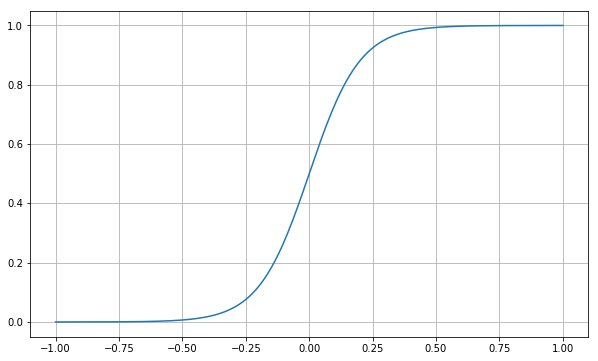

In [23]:
plt.figure(figsize=(10,6))
plt.plot(np.linspace(-1,1,num=200),sigmoid(np.linspace(-10,10,num=200)))
plt.grid(True)

Text(0.5, 1.0, "b'cat'")

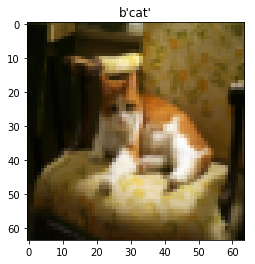

In [34]:
plt.imshow(train_set_x_orig[7])
plt.title(classes[train_set_y[0,7]])

In [81]:
def initialise_parameter(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [122]:
def forwardPropagation(X,y,w,b):
    m = X.shape[1]
    z = np.dot(w.T , X) + b
    a = sigmoid(z) #a->Predicted value for X & shape of a is -> (1 , m)
    cost = (-1 / m) * np.sum((y*np.log(a) + (1-y)*np.log(1-a))) #cost function for the particular w & b
    
    return a,cost

In [123]:
def backpropagation(X,y,w,b,alpha):
    a,cost = forwardPropagation(X,y,w,b)
    
    m = X.shape[1]
    #da = (-y / a) + ((1 - y) / (1 - a))
    dz = a - y
    dw = (1 / m) * np.dot(X,dz.T)
    db = (1 / m) * np.sum(dz)
    
    w = w - alpha * dw
    b = b - alpha * db
    
    return w,b,cost

In [139]:
def predict(X,y,w,b):
    z = np.dot(w.T , X) + b
    a = sigmoid(z)
    a = np.where(a<=0.5 , 0 , 1)
    return (a==y).mean()

In [146]:
def model(X_train,y_train,X_test,y_test,alpha=0.005,iteration=2000,print_details=False):
    w,b = initialise_parameter(X_train.shape[0])
    Cost = []
    train_acc = []
    test_acc  = []
    for it in range(iteration+1):
        w,b,cost = backpropagation(X_train,y_train,w,b,alpha)
        if print_details and it%100==0:
            print("Loss on epoch %d is : %.5f and Acc for Training Set is : %5f and Acc for Testing set is : %.5f"%(it,cost,predict(X_train,y_train,w,b),predict(X_test,y_test,w,b)))
        Cost.append(cost)
        train_acc.append(predict(X_train,y_train,w,b))
        test_acc.append(predict(X_test,y_test,w,b))
    return {"w":w,"b":b},{"loss":Cost,"train_acc":train_acc,"test_acc":test_acc}

In [147]:
param,history = model(X_train/255,train_set_y,X_test/255,test_set_y,print_details=True)

Loss on epoch 0 is : 0.69315 and Acc for Training Set is : 0.655502 and Acc for Testing set is : 0.34000
Loss on epoch 100 is : 0.58451 and Acc for Training Set is : 0.665072 and Acc for Testing set is : 0.34000
Loss on epoch 200 is : 0.46695 and Acc for Training Set is : 0.732057 and Acc for Testing set is : 0.38000
Loss on epoch 300 is : 0.37601 and Acc for Training Set is : 0.851675 and Acc for Testing set is : 0.60000
Loss on epoch 400 is : 0.33146 and Acc for Training Set is : 0.913876 and Acc for Testing set is : 0.68000
Loss on epoch 500 is : 0.30327 and Acc for Training Set is : 0.923445 and Acc for Testing set is : 0.74000
Loss on epoch 600 is : 0.27988 and Acc for Training Set is : 0.937799 and Acc for Testing set is : 0.74000
Loss on epoch 700 is : 0.26004 and Acc for Training Set is : 0.952153 and Acc for Testing set is : 0.74000
Loss on epoch 800 is : 0.24294 and Acc for Training Set is : 0.956938 and Acc for Testing set is : 0.74000
Loss on epoch 900 is : 0.22800 and Acc 

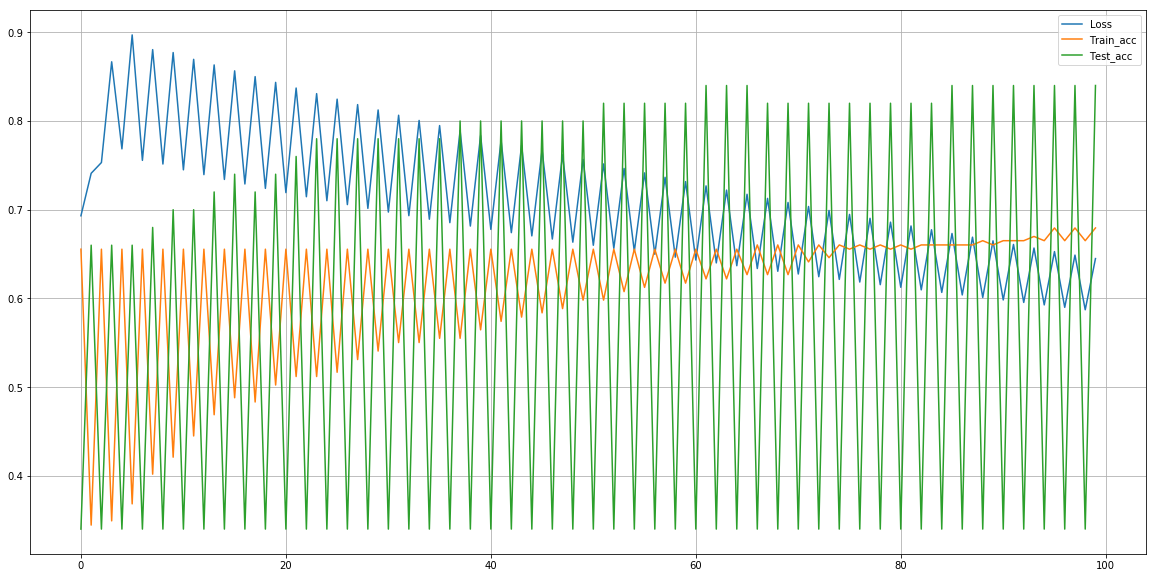

In [150]:
plt.figure(figsize=(20,10))
plt.plot(history['loss'][:100],label="Loss")
plt.plot(history['train_acc'][:100],label="Train_acc")
plt.plot(history['test_acc'][:100],label="Test_acc")
plt.grid("True")
plt.legend()

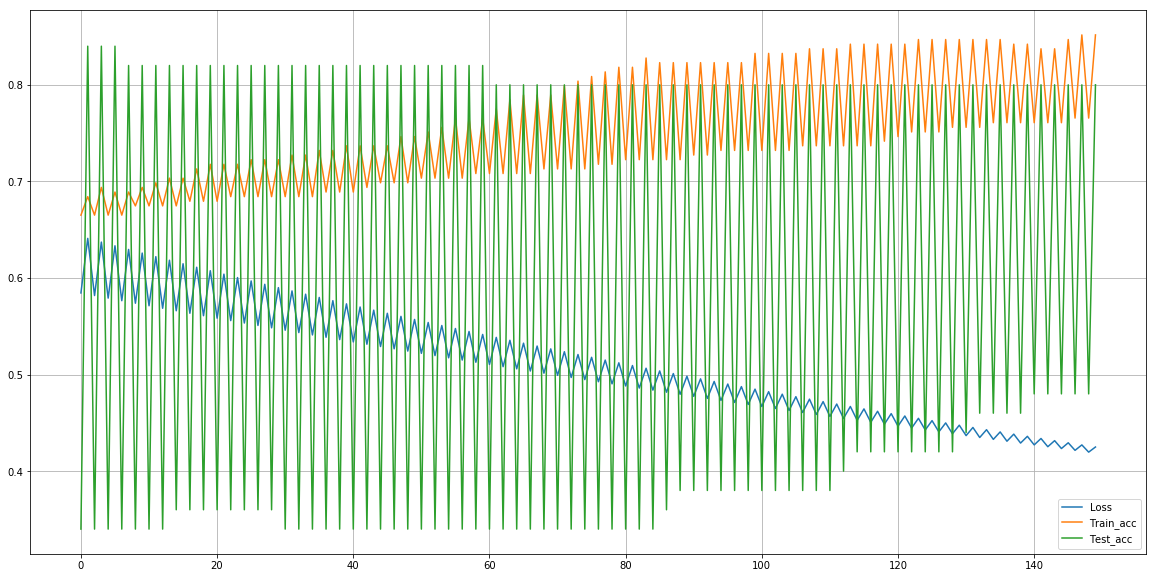

In [153]:
plt.figure(figsize=(20,10))
plt.plot(history['loss'][100:250],label="Loss")
plt.plot(history['train_acc'][100:250],label="Train_acc")
plt.plot(history['test_acc'][100:250],label="Test_acc")
plt.grid("True")
plt.legend()

In [157]:
def predict_class(X,w,b):
    a = sigmoid(np.dot(w.T,X)+b)
    return np.where (a<=0.5 , 0 , 1)

In [173]:
predict_class(X_train[:,:10]/255,param['w'],param['b'])[0]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [174]:
train_set_y[0,:10]

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)